In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("BreadBasket_DMS.csv")
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


# Extracting Year, Month, Day, Hour, and Minute to Seprarate columns

In [6]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [7]:
df.head()

,Date,Time,Transaction,Item,year
0,2016-10-30,09:58:11,1,Bread,2016
1,2016-10-30,10:05:34,2,Scandinavian,2016
2,2016-10-30,10:05:34,2,Scandinavian,2016
3,2016-10-30,10:07:57,3,Hot chocolate,2016
4,2016-10-30,10:07:57,3,Jam,2016


df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [8]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [9]:
df['hour'] = pd.DatetimeIndex(df['Time']).hour
df['minute'] = pd.DatetimeIndex(df['Time']).minute

In [23]:
df.head()

,Date,Time,Transaction,Item,year,month,day,hour,minute
0,2016-10-30,09:58:11,1,Bread,2016,10,30,9,58
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10,7
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10,7


# Let's do Graphics

In [47]:
import seaborn as sns

## Transaction by Month

Although we are showing number of items sold by month but since for April and October we don't have full data so we can not rely on this to make any decision

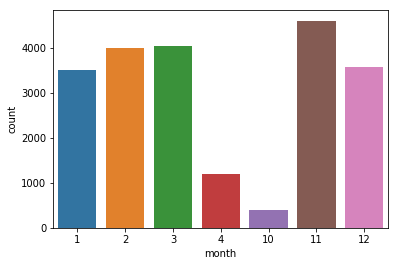

In [76]:
sns.countplot(data=df, x="month")

## Transaction by Hour on any given day

By lloking at the Data below it looks like Bakery opne hours are 7:00am to 1:00am.

Out of which most of the sales happens during 9:00am to 3:00pm, so they should consider hiring a part time helper for this period. After 6 pm sales are very low

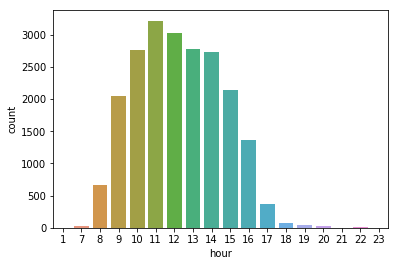

In [77]:
sns.countplot(data=df, x="hour")

## Facet Grid based on Items and Hours

The graph elow is same as above just the difference is now each of the graph is showing sales info about different product

Analuzing graph below reveals that during morning hours that is before 12pm Bread, Coffee, Tea, Pastry, Crepes, and Juice are sold most.
While during afternoon its Chicken Sandwitch, Cookies, Tartine, Soup, Smoothies, Focaccia, Brownie, Eggs, Veganmincepie goes well.

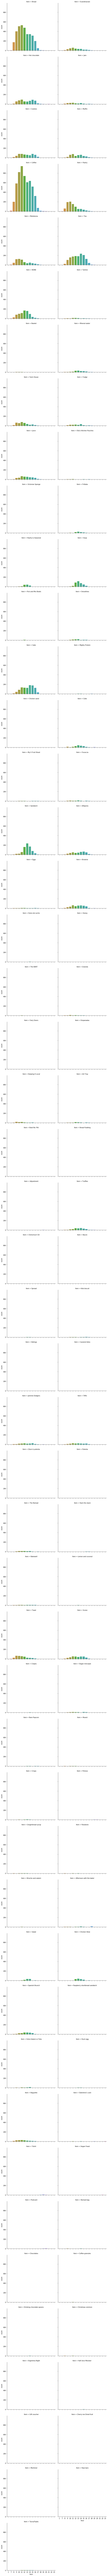

In [78]:
sns.catplot(data=df, x="hour", kind="count",col="Item",col_wrap=2)

##Sales With respect to Day of Month

Can't see any goof pattern except of 3,4,5 Day of any given month there are more sales than normal, probably because peoples get their payslips and have cash in hand to buy

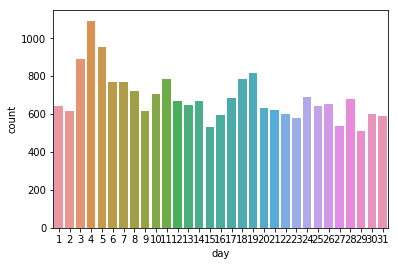

In [79]:
sns.countplot(data=df, x="day")

## Facet Grid based on Items and Day of Month

Lets see if we can find any pattern or relation between Day of Month and Item Sales

-> Coffee is sold most on 3rd, 4th, and 5th of every month

-> Basket is sold most during start and end of month

-> Hearty and Seasonal Bowls get drop in sales during 21st and 26th of every month

-> Soup are not sold on 20th day.

-> Picka and Mix Bowls, and Mighty Protien are only sold during start and End of month.

-> Kids biscuits, Caramel bites and Siblings are sold during middle of the month

-> Bakewell, and Lemon & coconut is sold during last of the month

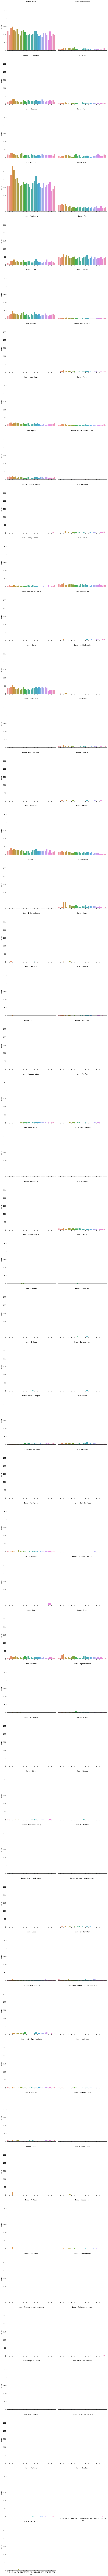

In [80]:
sns.catplot(data=df, x="day", kind="count",col="Item",col_wrap=2)

## Items relation with Day of week

There is no column as day of week in original data set so we have to compute one

In [82]:
df['my_dates'] = pd.to_datetime(df['Date'])

In [83]:
df.head(10)

,Date,Time,Transaction,Item,year,month,day,hour,minute,my_dates
0,2016-10-30,09:58:11,1,Bread,2016,10,30,9,58,2016-10-30
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5,2016-10-30
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5,2016-10-30
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10,7,2016-10-30
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10,7,2016-10-30
5,2016-10-30,10:07:57,3,Cookies,2016,10,30,10,7,2016-10-30
6,2016-10-30,10:08:41,4,Muffin,2016,10,30,10,8,2016-10-30
7,2016-10-30,10:13:03,5,Coffee,2016,10,30,10,13,2016-10-30
8,2016-10-30,10:13:03,5,Pastry,2016,10,30,10,13,2016-10-30
9,2016-10-30,10:13:03,5,Bread,2016,10,30,10,13,2016-10-30


In [84]:
df['day_of_week'] = df['my_dates'].dt.weekday_name

In [91]:
df.head(10)

,Date,Time,Transaction,Item,year,month,day,hour,minute,my_dates,day_of_week
0,2016-10-30,09:58:11,1,Bread,2016,10,30,9,58,2016-10-30,Sunday
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5,2016-10-30,Sunday
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5,2016-10-30,Sunday
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10,7,2016-10-30,Sunday
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10,7,2016-10-30,Sunday
5,2016-10-30,10:07:57,3,Cookies,2016,10,30,10,7,2016-10-30,Sunday
6,2016-10-30,10:08:41,4,Muffin,2016,10,30,10,8,2016-10-30,Sunday
7,2016-10-30,10:13:03,5,Coffee,2016,10,30,10,13,2016-10-30,Sunday
8,2016-10-30,10:13:03,5,Pastry,2016,10,30,10,13,2016-10-30,Sunday
9,2016-10-30,10:13:03,5,Bread,2016,10,30,10,13,2016-10-30,Sunday


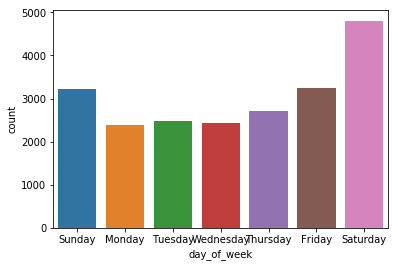

In [92]:
sns.countplot(data=df, x="day_of_week")

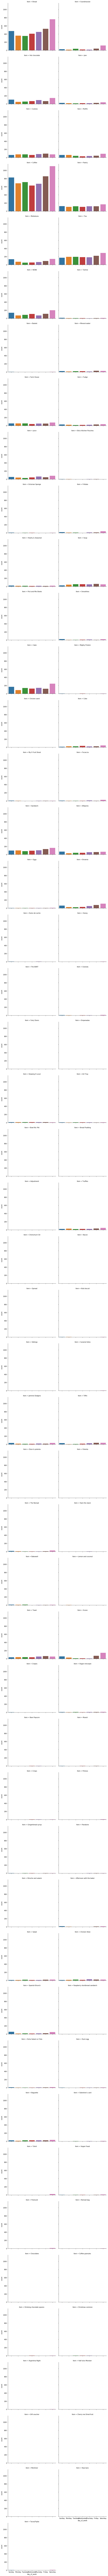

In [93]:
sns.catplot(data=df, x="day_of_week", kind="count",col="Item",col_wrap=2)

Looks like most of the items are sold during weekends except for Soup and Chicken Stew